In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
%matplotlib inline


In [3]:
import pandas as pd
df = pd.read_csv(r'C:\Users\sreea\Downloads\googleplaystore.csv')
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
print("Missing values per column:\n")
print(df.isnull().sum())

df.dropna(subset=['Rating', 'Reviews', 'Size', 'Installs'], inplace=True)

df['Type'].fillna('Free', inplace=True)
df['Current Ver'].fillna(method='ffill', inplace=True)
df['Android Ver'].fillna(method='bfill', inplace=True)

print("\nRemaining missing values:\n")
print(df.isnull().sum())


Missing values per column:

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Remaining missing values:

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [7]:
import numpy as np

df['Reviews'] = df['Reviews'].replace('3.0M', '3000000')  
df['Reviews'] = df['Reviews'].astype(float).astype(int)

df['Installs'] = df['Installs'].str.replace(',', '', regex=False)
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)

df = df[df['Installs'].str.isnumeric()]  
df['Installs'] = df['Installs'].astype(int)

df['Price'] = df['Price'].str.replace('$', '', regex=False)

df = df[df['Price'].str.replace('.', '', 1).str.isnumeric()]  
df['Price'] = df['Price'].astype(float)

def convert_size(size):
    try:
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1000  
        elif size == 'Varies with device':
            return np.nan
        else:
            return np.nan
    except:
        return np.nan

df['Size'] = df['Size'].apply(convert_size)

df['Size'].fillna(df['Size'].median(), inplace=True)

print(df.dtypes[['Reviews', 'Installs', 'Price', 'Size']])


Reviews       int32
Installs      int32
Price       float64
Size        float64
dtype: object


In [8]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

df.drop_duplicates(inplace=True)

print(f"Dataset shape after removing duplicates: {df.shape}")


Number of duplicate rows: 474
Dataset shape after removing duplicates: (8892, 13)


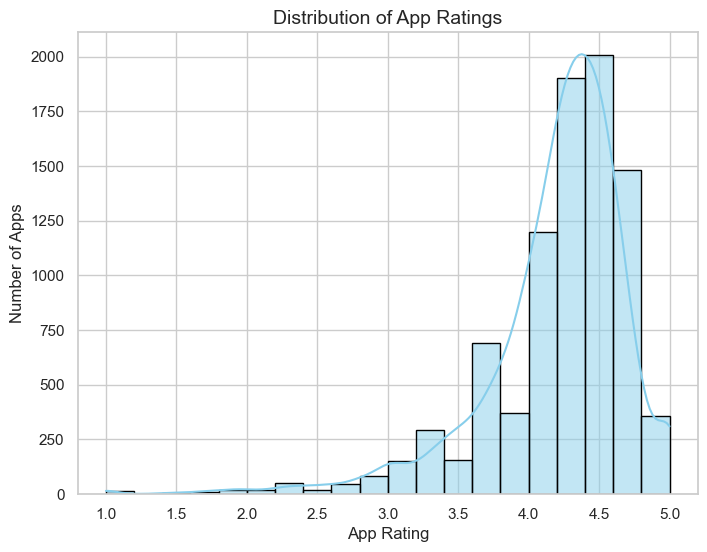

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of App Ratings', fontsize=14)
plt.xlabel('App Rating', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.grid(True)
plt.show()


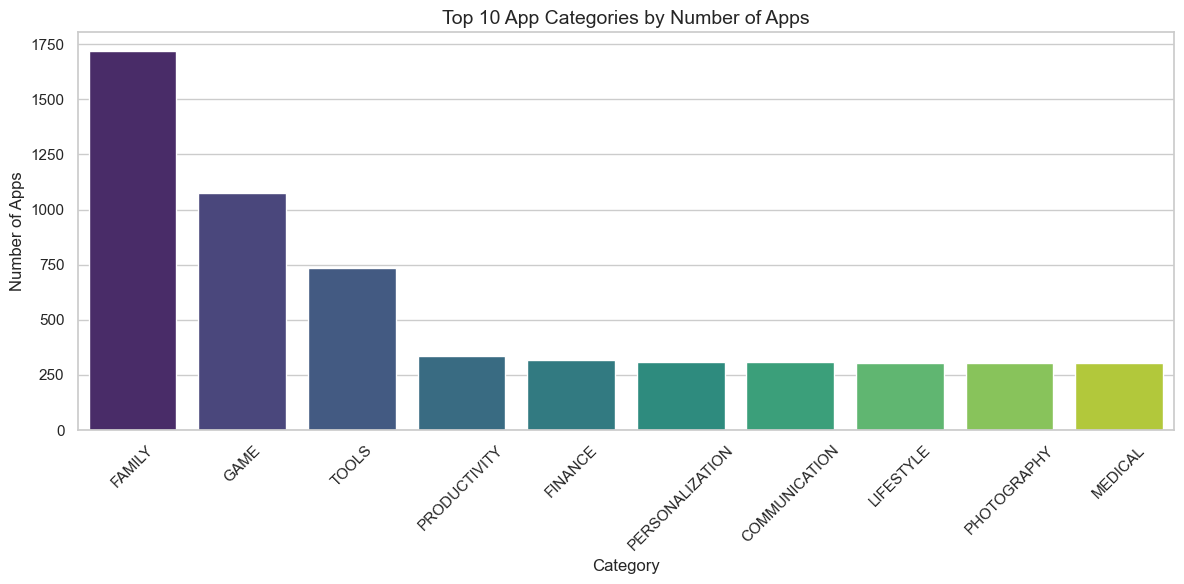

In [10]:
top_categories = df['Category'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')

plt.title('Top 10 App Categories by Number of Apps', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


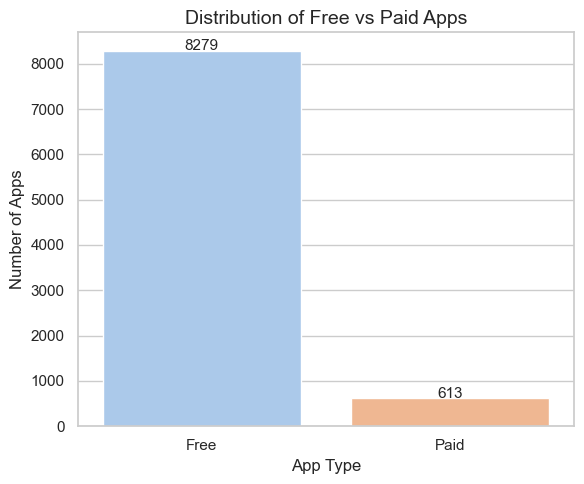

In [11]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Type', data=df, palette='pastel')

plt.title('Distribution of Free vs Paid Apps', fontsize=14)
plt.xlabel('App Type', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2., height + 20, f'{int(height)}', ha="center", fontsize=11)

plt.tight_layout()
plt.show()


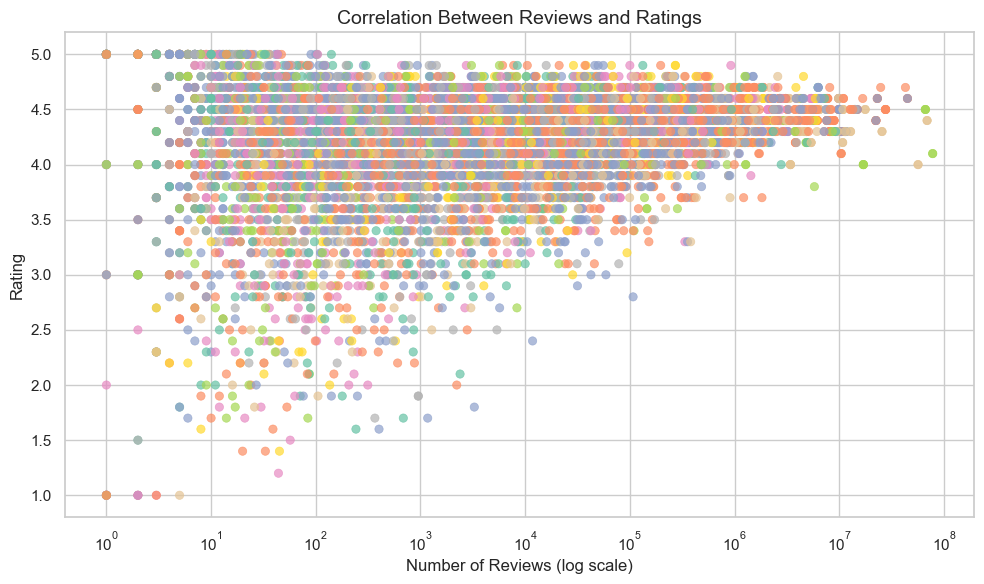

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Reviews',
    y='Rating',
    hue='Category',
    palette='Set2',
    alpha=0.7,
    edgecolor=None,
    legend=False  
)
plt.xscale('log')
plt.title('Correlation Between Reviews and Ratings', fontsize=14)
plt.xlabel('Number of Reviews (log scale)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


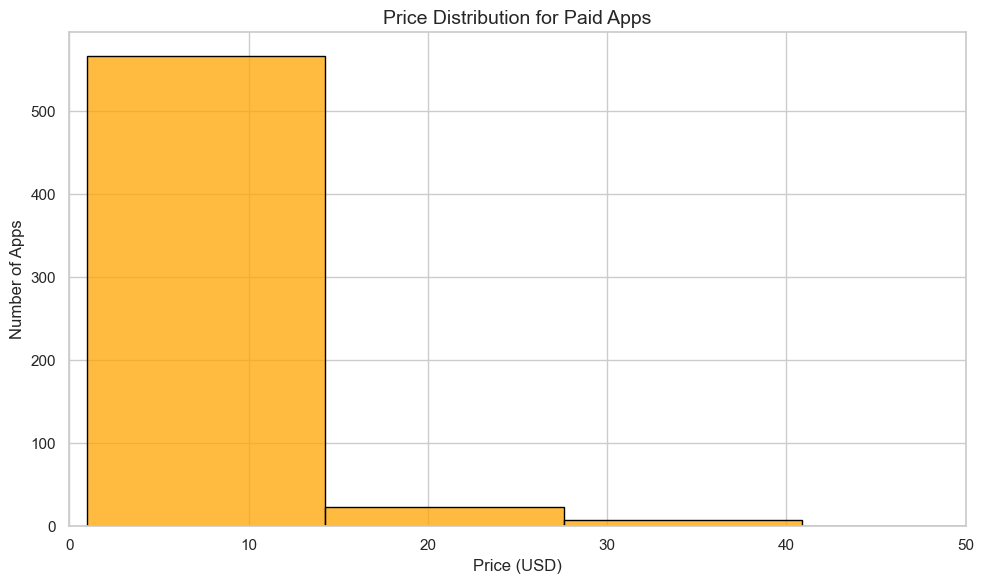

In [13]:
paid_apps = df[df['Type'] == 'Paid']
plt.figure(figsize=(10, 6))
sns.histplot(paid_apps['Price'], bins=30, color='orange', edgecolor='black')

plt.xlim(0, 50)  # Focus on apps priced under $50

plt.title('Price Distribution for Paid Apps', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


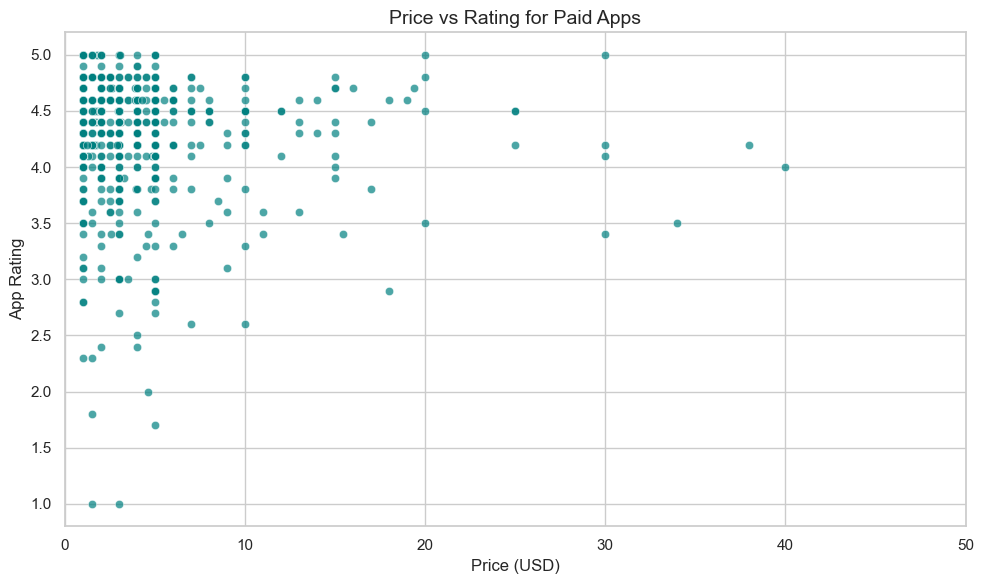

In [14]:
paid_apps = df[df['Type'] == 'Paid']
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=paid_apps,
    x='Price',
    y='Rating',
    color='teal',
    alpha=0.7
)
plt.xlim(0, 50)
plt.title('Price vs Rating for Paid Apps', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('App Rating', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


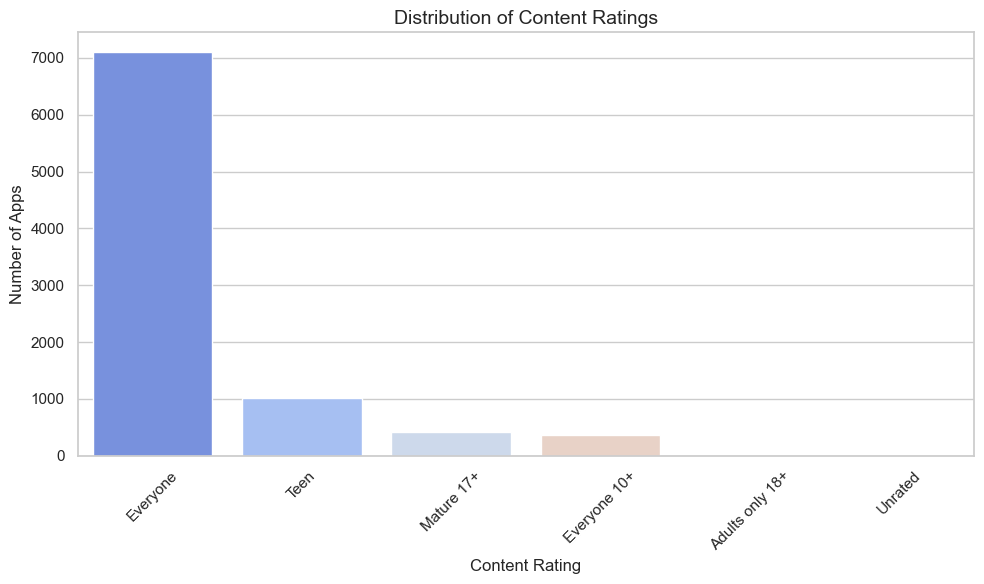

In [15]:
content_counts = df['Content Rating'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(
    x=content_counts.index,
    y=content_counts.values,
    palette='coolwarm'
)
plt.title('Distribution of Content Ratings', fontsize=14)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


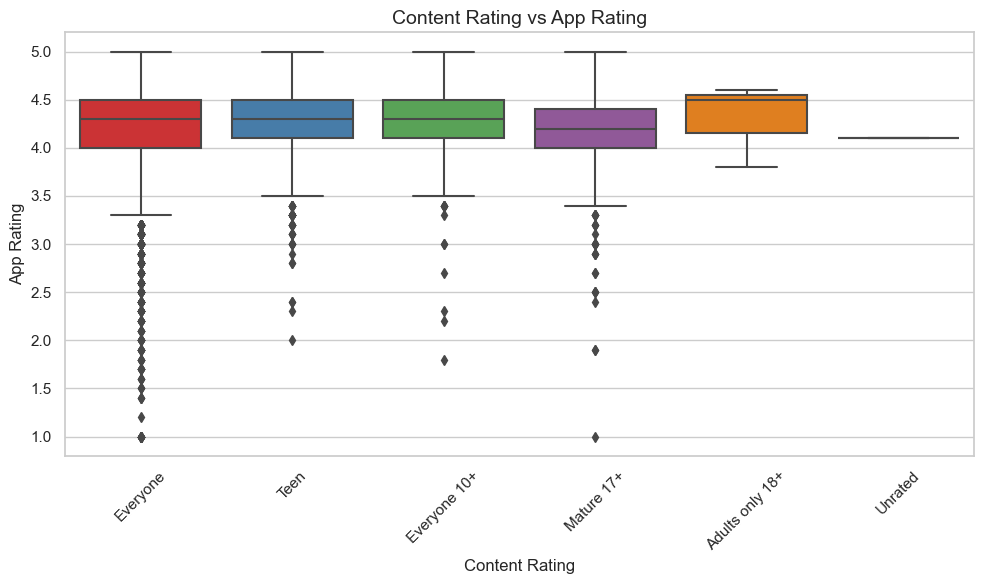

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Content Rating',
    y='Rating',
    data=df,
    palette='Set1'
)
plt.title('Content Rating vs App Rating', fontsize=14)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('App Rating', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


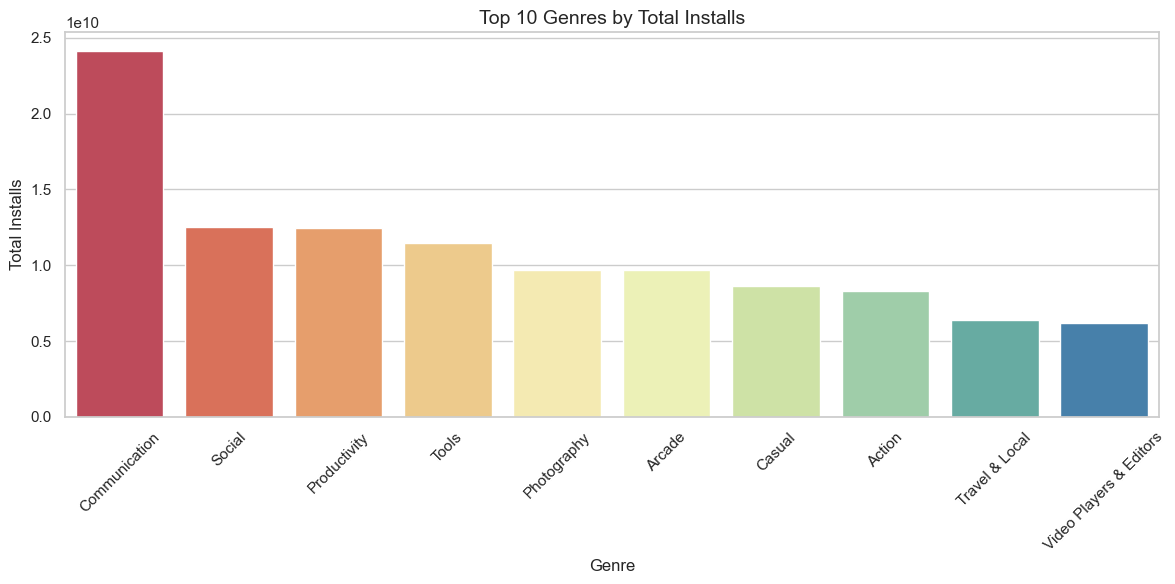

In [17]:
top_genres_by_installs = (
    df.groupby('Genres')['Installs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_genres_by_installs.index,
    y=top_genres_by_installs.values,
    palette='Spectral'
)

plt.title('Top 10 Genres by Total Installs', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Installs', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Content Rating'] = label_encoder.fit_transform(df['Content Rating'])
df['Genres'] = label_encoder.fit_transform(df['Genres'])
X = df[['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Genres', 'Content Rating']]
y = df['Rating']
y.fillna(y.median(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (6224, 8)
Testing set shape: (2668, 8)


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
print(f"✅ R-squared Score (R²): {r2:.4f}")


✅ Mean Squared Error (MSE): 0.2430
✅ R-squared Score (R²): 0.0848
